In [116]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# imprime a imagem
def showImage(image):
    # definindo o tamanho da imagem
    img = plt.figure(figsize=(15,14))
    ax = img.add_subplot(111)
    ax.imshow(image, cmap='gray')

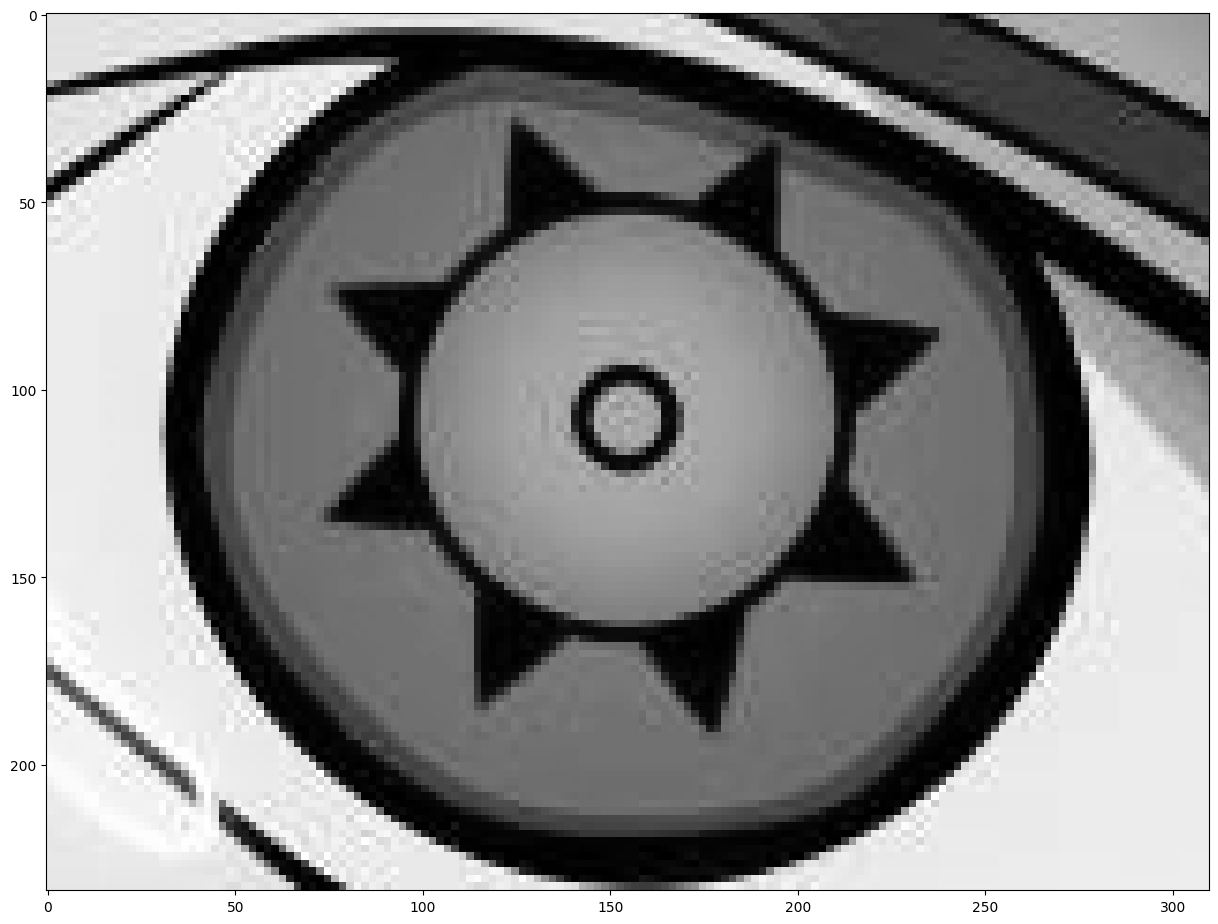

In [118]:
# carregando as imagens
mangekyou = cv2.imread('../../assets/sharingan.png')
mangekyou = cv2.cvtColor(mangekyou, cv2.COLOR_BGR2GRAY)
showImage(mangekyou)

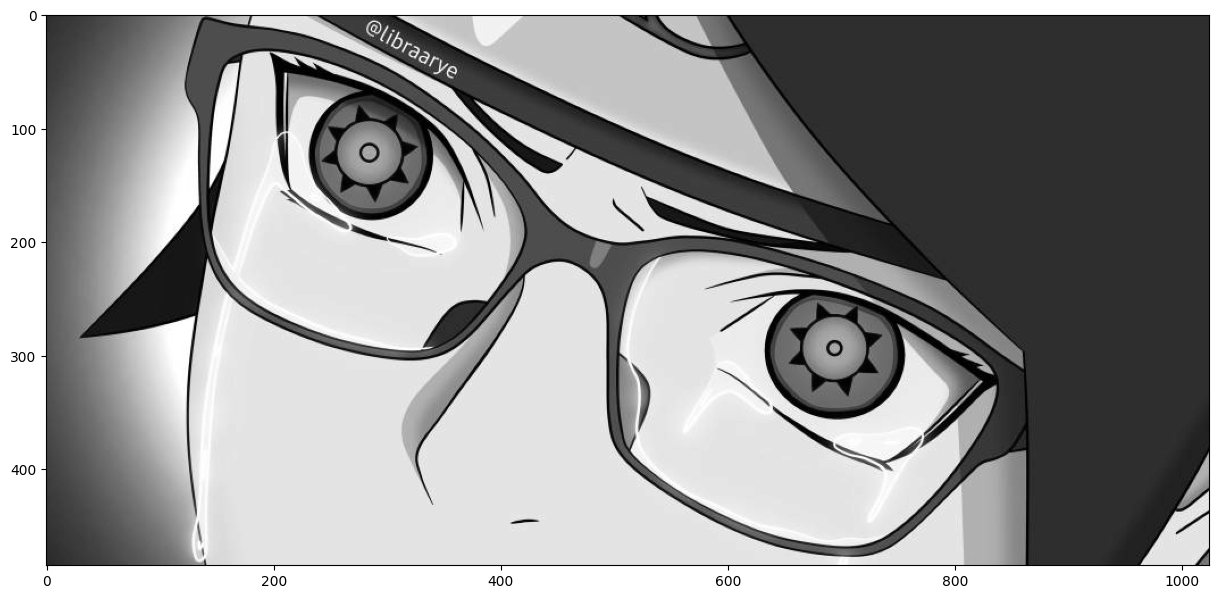

In [119]:
# carregando as imagens
sarada = cv2.imread('../../assets/sharingan-active.jpeg')
sarada = cv2.cvtColor(sarada, cv2.COLOR_BGR2GRAY)
showImage(sarada)

In [120]:
# criando o modelo
sift = cv2.xfeatures2d.SIFT_create()

In [121]:
# criando os kpoints e destinos
kp1, des1 = sift.detectAndCompute(mangekyou, None)
kp2, des2 = sift.detectAndCompute(sarada, None)

In [122]:
# aplica a força bruta
forceBrute = cv2.BFMatcher()

In [123]:
# gerando o matches
matches = forceBrute.knnMatch(des1, des2, k=2)

In [124]:
# matches
good =[]

for match1, match2 in matches:
    # guarda o match1 quando ele for menor que match2
    if match1.distance < 0.2 * match2.distance:
        good.append([match1])

good

[[< cv2.DMatch 0x158b61e50>],
 [< cv2.DMatch 0x158b61070>],
 [< cv2.DMatch 0x158b61f10>],
 [< cv2.DMatch 0x15a1e6e10>],
 [< cv2.DMatch 0x158bead70>],
 [< cv2.DMatch 0x158be9cf0>],
 [< cv2.DMatch 0x158be9cd0>]]

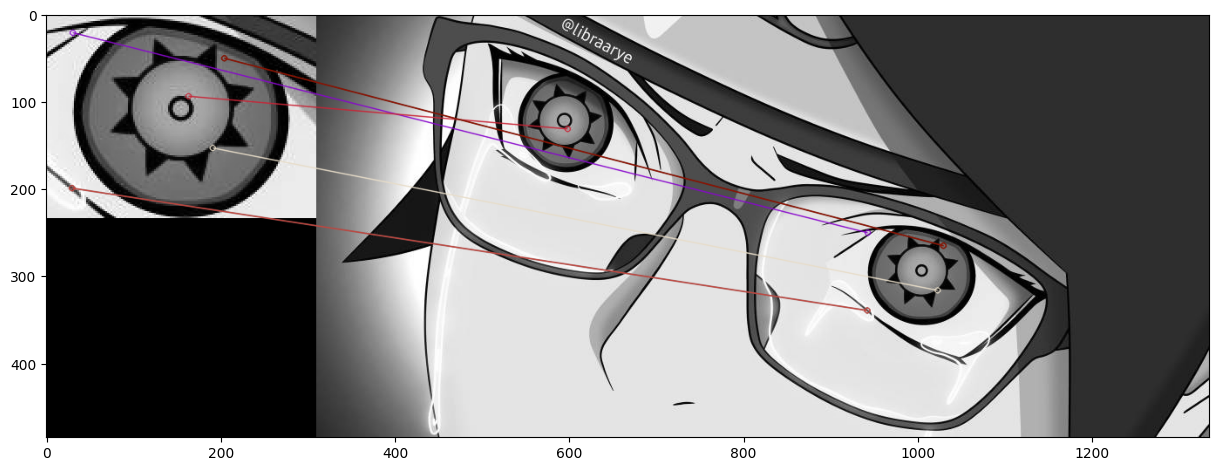

In [130]:
# montar a composição usando os pontos chaves
siftMatches = cv2.drawMatchesKnn(mangekyou, kp1, sarada, kp2, good, None, flags=2)
showImage(siftMatches)

Criando máscara

In [136]:
# inicializa uma lista, onde cada elemento recebe [0,0]
matchesMask = [[0,0] for i in range(len(matches))]

In [137]:
for i, (match1, match2) in enumerate(matches):
    # verifica de a distância entre o match1 e match2 atende ao critério de qualidade (Limiar de Distância)
    if match1.distance < 0.75 * match2.distance:
        matchesMask[i] = [1,0]

In [160]:
# configuração dos parâmetros para desenhar as correspondências na imagem 
drawParams = dict(matchColor=(255,0,0), singlePointColor=(0,0,255), matchesMask=matchesMask, flags=2)

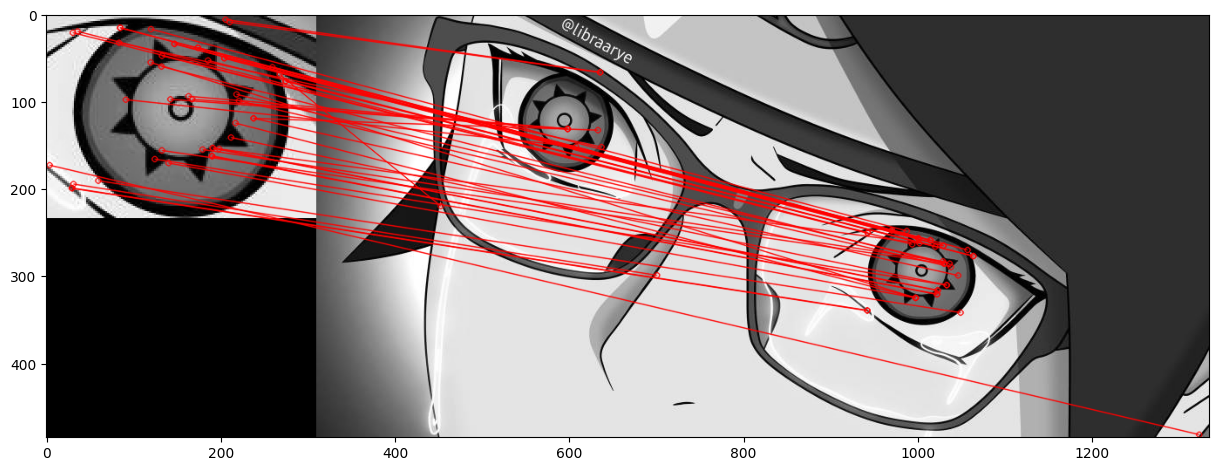

In [161]:
#gerando a imagem
flannMatches = cv2.drawMatchesKnn(mangekyou, kp1, sarada, kp2, matches, None, **drawParams)
# mostrandoa imagem
showImage(flannMatches)